In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
X_train, y_train = load_data("samples/microchips.csv") 

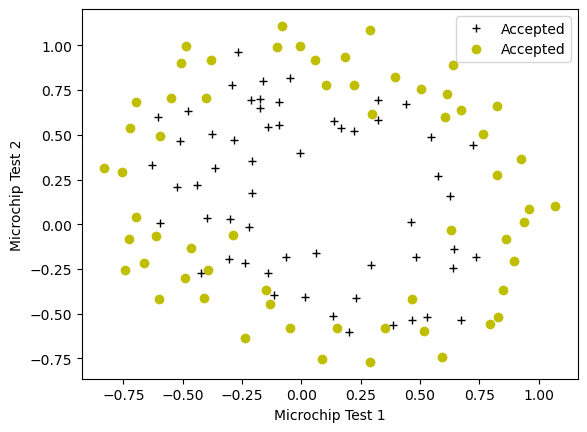

In [3]:
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right")
plt.show()

In [4]:
def sigmoid(z):
    g = 1.0 / (1.0 + np.exp(-z))
    return g

In [5]:
def compute_cost(X, y, w, b, _):
    m, n = X.shape

    total_cost = 0
    
    for i in range(m):
        zwb_x = np.dot(X[i], w) + b
        fwb_x = sigmoid(zwb_x)
        loss = (-y[i] * np.log(fwb_x)) - ((1 - y[i]) * np.log(1 - fwb_x))
        total_cost += loss

    total_cost = total_cost / m
    
    return total_cost

In [6]:
def compute_gradient(X, y, w, b, _):
    m, n = X.shape
    
    dj_db = .0
    dj_dw = np.zeros(w.shape)

    for i in range(m):
        zwb_x = np.dot(X[i], w) + b
        fwb_x = sigmoid(zwb_x)
        dj_db += fwb_x - y[i]

        for j in range(n):
            dj_dw[j] += (fwb_x - y[i]) * X[i][j]

    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

In [7]:
def compute_gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_, iterations):
    for idx in range(iterations):
        dj_dw, dj_db = compute_gradient(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if ((idx + 1) % 1000 == 0 or idx == 0):
            print(f"Iteration {idx + 1}: Cost {cost_function(X, y, w_in, b_in, lambda_):8.2f}")


    return w_in, b_in    

In [8]:
def predict(w, b, x):
    m, n = x.shape
    p = np.zeros(m)

    for idx in range(m):
        zwb_x = np.dot(w, x[idx]) + b
        fwb_x = sigmoid(zwb_x)

        p[idx] = fwb_x >= .05

    return p

In [9]:
def evaluate(w, b, x, y):
    p = predict(w, b, x)

    return np.round(np.mean(p == y) * 100)

In [10]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.05

w, b = compute_gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, -1, iterations)

Iteration 1: Cost     3.89
Iteration 1000: Cost     0.69
Iteration 2000: Cost     0.69
Iteration 3000: Cost     0.69
Iteration 4000: Cost     0.69
Iteration 5000: Cost     0.69
Iteration 6000: Cost     0.69
Iteration 7000: Cost     0.69
Iteration 8000: Cost     0.69
Iteration 9000: Cost     0.69
Iteration 10000: Cost     0.69


Precision: 49.0%


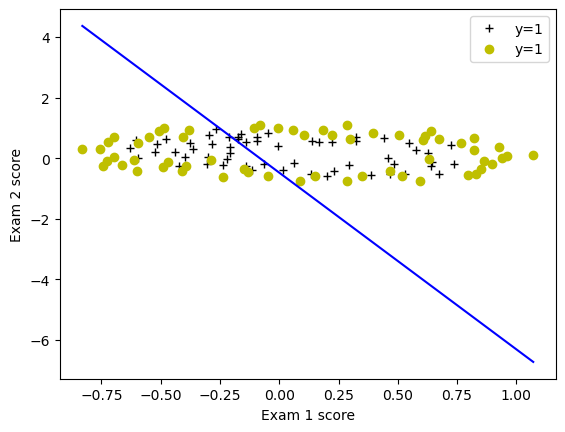

In [11]:
plot_decision_boundary(w, b, X_train, y_train)

plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
print(f"Precision: {evaluate(w, b, X_train, y_train)}%")
plt.show()

### Applying Feature Engineering

As we can see, the model has a miserable precision. The reason for the poor precisions comes from the fact that a linear function cant quite fit the data. Hence, we can improve it applying **feature engineering** to have a non linear model.

In [12]:
mapped_X_train = map_feature(X_train[:, 0], X_train[:, 1])
initial_w = np.random.rand(mapped_X_train.shape[1]) - 0.5
intial_b = 0.5

w, b = compute_gradient_descent(mapped_X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, -1, iterations)

Iteration 1: Cost     3.93
Iteration 1000: Cost     0.57
Iteration 2000: Cost     0.48
Iteration 3000: Cost     0.44
Iteration 4000: Cost     0.41
Iteration 5000: Cost     0.40
Iteration 6000: Cost     0.38
Iteration 7000: Cost     0.38
Iteration 8000: Cost     0.37
Iteration 9000: Cost     0.36
Iteration 10000: Cost     0.36


Precision: 61.0%


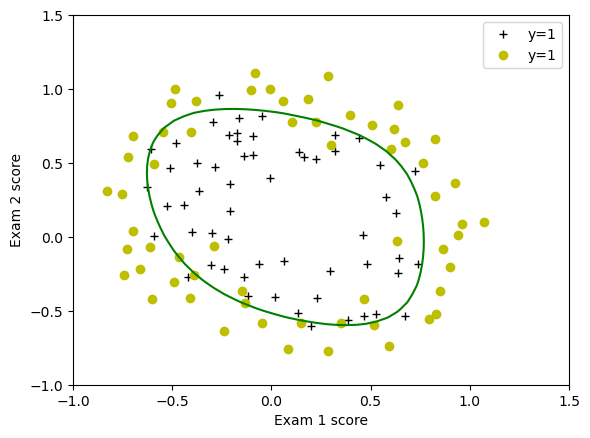

In [13]:
plot_decision_boundary(w, b, mapped_X_train, y_train)

plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
print(f"Precision: {evaluate(w, b, mapped_X_train, y_train)}%")
plt.show()